<h2>Alexander Lerma</h2>
<h2>CS 422</h2>
<h2>Fall 2016</h2>
<h1>HW1<h1>

<h3>2.1 Problem 1</h3>

Load the auto-mpg sample dataset into the Orange application, and visualize the dataset. Create a scatterplot between mpg and weight - what is the basic relationship between these variables using just visual inspection? Do the results make sense? Why?

<i>Scatterplot between mpg and weight</i>
![title](img/auto_mpg_scatter.png)

As weight increases, mpg decreases, and as weight decreases, mpg increases. This result makes sense because heavier vehicles tend to get poorer gas millage.



<h3>2.2 Problem 2</h3>

Load the auto-mpg sample dataset into Python using a Pandas dataframe. The horsepower feature has a few missing values with a ? - replace these with a NaN from NumPy, and calculate summary statistics for each numerical column. How do the summary statistics vary when excluding the NaNs, vs. imputing them with the mean (Hint: Use an Imputer from Scikit) - can we do better than just using the overall sample mean?

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import Imputer

In [2]:
lines = [line.rstrip('\n') for line in open('dataset/auto-mpg.data.txt')]
data = []
for line in lines:
    attributes = line.split('\t')[0]
    attributes = ' '.join(attributes.split()).split(' ')
    if attributes[3] == '?':
        attributes[3] = np.nan
    data.append(attributes)

In [3]:
data = np.array(data)
feature_names = ['mpg', 'cylinders', 'displacement', 'horsepower','weight',
        'acceleration', 'model year', 'origin']
df = pd.DataFrame(data, columns=feature_names)
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,398,398,398,398,398,398,398,398
unique,129,5,82,94,351,96,13,3
top,13.0,4,97.00,150.0,2130.,14.5,73,1
freq,20,204,21,22,4,23,40,249


In [4]:
imp = Imputer(missing_values='NaN', strategy='mean')
reduced = imp.fit_transform(data)
df = pd.DataFrame(reduced, columns=feature_names)
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.199187,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,95.000000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


After observing the dataset both before and after replaceing NaN values, we see how essential it is to clean up a dataset before using for data mining purposes. 

Without replacing values, we observed that that only four basic statistics were available for describing the data. The result provides a somewhat basic statistical understanding of the dataset, but excludes many essential values. 

After replacing the NaN values, we observe that SciKit is able to generate a more robust summary of the dataset. With proper values filled in, SciKit is able to provide us with more immediate information. This simple step of preprocessing the dataset will benefit other applied data mining techniques by producing better outputs. 


<h3>2.3 Problem 3</h3>

Load the iris sample dataset into Python using a Pandas dataframe. Perform a PCA using the Scikit Decomposition component, and provide the percentage of variance explained by the 1st Principal Component. Use Matplotlib to plot the 1st/2nd Principal Components to recreate the scatterplot shown in class, with colored classes for each flower type.


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
%matplotlib inline

In [6]:
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names
df = pd.DataFrame(X, columns=iris.feature_names)
df['target'] = target_names[y]
df.groupby('target').head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor
53,5.5,2.3,4.0,1.3,versicolor
54,6.5,2.8,4.6,1.5,versicolor


In [7]:
pca = PCA(n_components=2)
X_r = pca.fit_transform(X)
#percentage of variance explained by first component
print('Explained variance ratio of first component: %s' % str(pca.explained_variance_ratio_[0]))

Explained variance ratio of first component: 0.924616207174


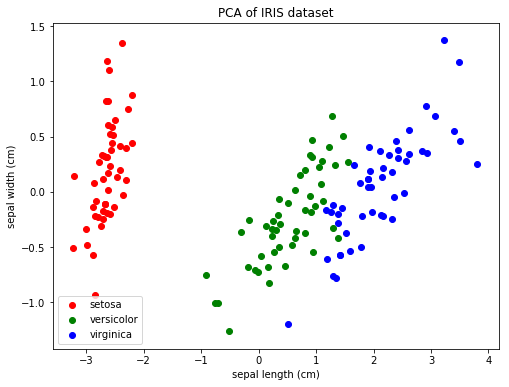

In [46]:
plt.figure(figsize=(8,6))
for c, i, target_name in zip("rgb", [0, 1, 2], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], c=c, label=target_name)
    
plt.legend()
plt.title('PCA of IRIS dataset')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.show()

<h3>2.4 Problem 4</h3>

Build two classification trees using the iris sample dataset within the Orange application. Keep all parameters for both classifiers the same (Feature Selection, Pruning), and modify the Limit Depth parameter to a smaller value than the default (e.g., from 10 to 2). How does this affect the Precision and Recall of the classifier? What types of flowers are misclassified? Why? What does Tan refer to as the border where these misclassifications occur?

<i>Tree Unchanged<i>
![title](img/tree_default.png)

<i>Tree With Depth Limit of 2</i>
![title](img/tree_changed.png)

Precision and Recall are both worse when limiting the depth that the tree may grow. Iris-versicolor is most often misclassified. This could be due to it being very similar to iris-virginica. Tan says “the border between two neighboring regions of different classes is known as a decision boundary.”
